# 31009 - Assignment 4: Random Forest

## 1. Data Processing

In [26]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('data/default of credit card clients.xls')
df.dropna(how='any', axis = 0, inplace=True)

In [3]:
def split_data(data):
    msk = np.random.rand(len(data)) < 0.8
    return df[msk], df[~msk]

In [4]:
np.random.seed(123)
tn, tt = split_data(df)

X_tn = tn.drop(columns='default payment next month')
y_tn = tn['default payment next month']

X_tt = tt.drop(columns='default payment next month')
y_tt = tt['default payment next month']

## 2. Random Forest Classifier - Base Model

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics as skm

In [6]:
clf = RandomForestClassifier()

clf.fit(X_tn, y_tn)

y_tn_pred = clf.predict(X_tn)
y_tt_pred = clf.predict(X_tt)

y_tn_proba = clf.predict_proba(X_tn)
y_tt_proba = clf.predict_proba(X_tt)

print("Train Score:", round(clf.score(X_tn, y_tn),2))
print("\nTrain Confusion Matrix")
print(skm.confusion_matrix(y_tn, y_tn_pred))
print("\nTrain Classification Report")
print(skm.classification_report(y_tn, y_tn_pred))
print("\nTrain ROC AUC")
print(skm.roc_auc_score(y_tn, y_tn_proba[:,1]))
print("")

print("Test Score:", round(clf.score(X_tt, y_tt),2))
print("\nTest Confusion Matrix")
print(skm.confusion_matrix(y_tt, y_tt_pred))
print("\nTest Classification Report")
print(skm.classification_report(y_tt, y_tt_pred))
print("\nTest ROC AUC")
print(skm.roc_auc_score(y_tt, y_tt_proba[:,1]))

Train Score: 0.98

Train Confusion Matrix
[[18706    31]
 [  453  4884]]

Train Classification Report
             precision    recall  f1-score   support

          0       0.98      1.00      0.99     18737
          1       0.99      0.92      0.95      5337

avg / total       0.98      0.98      0.98     24074


Train ROC AUC
0.999136434550902

Test Score: 0.81

Test Confusion Matrix
[[4367  260]
 [ 885  414]]

Test Classification Report
             precision    recall  f1-score   support

          0       0.83      0.94      0.88      4627
          1       0.61      0.32      0.42      1299

avg / total       0.78      0.81      0.78      5926


Test ROC AUC
0.7325154775672398


## 3. Random Forest Classifier - Grid Search

In [7]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': [500, 750, 1000],
    'max_features': [2, 4, 6]
}

clf = RandomForestClassifier()

grid_search = GridSearchCV(clf, parameters, cv=5, scoring='roc_auc',refit=True, n_jobs=-1, verbose=1)

grid_search.fit(X_tn, y_tn)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 29.9min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [500, 750, 1000], 'max_features': [2, 4, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [8]:
grid_search.best_params_

{'max_features': 2, 'n_estimators': 750}

In [9]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=750, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [10]:
rf = grid_search.best_estimator_

In [11]:
y_tn_pred = rf.predict(X_tn)
y_tt_pred = rf.predict(X_tt)

y_tn_proba = rf.predict_proba(X_tn)
y_tt_proba = rf.predict_proba(X_tt)

In [13]:
print("Train Score:", round(rf.score(X_tn, y_tn),2))
print("\nTrain Confusion Matrix")
print(skm.confusion_matrix(y_tn, y_tn_pred))
print("\nTrain Classification Report")
print(skm.classification_report(y_tn, y_tn_pred))
print("\nTrain ROC AUC:", round(skm.roc_auc_score(y_tn, y_tn_proba[:,1]), 2))
print("")

print("Test Score:", round(rf.score(X_tt, y_tt),2))
print("\nTest Confusion Matrix")
print(skm.confusion_matrix(y_tt, y_tt_pred))
print("\nTest Classification Report")
print(skm.classification_report(y_tt, y_tt_pred))
print("\nTest ROC AUC:", round(skm.roc_auc_score(y_tt, y_tt_proba[:,1]), 2))

Train Score: 1.0

Train Confusion Matrix
[[18733     4]
 [   11  5326]]

Train Classification Report
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     18737
          1       1.00      1.00      1.00      5337

avg / total       1.00      1.00      1.00     24074


Train ROC AUC: 1.0

Test Score: 0.82

Test Confusion Matrix
[[4379  248]
 [ 831  468]]

Test Classification Report
             precision    recall  f1-score   support

          0       0.84      0.95      0.89      4627
          1       0.65      0.36      0.46      1299

avg / total       0.80      0.82      0.80      5926


Test ROC AUC: 0.78


## 4. Model Comparison

  - What are the best parameters from the Grid Search? 
  - Does the Model from #3 outperform Model #2? 

### 4.1 What are the best parameters from the Grid Search?

In [17]:
grid_search.best_params_

{'max_features': 2, 'n_estimators': 750}

The best parameters from gid search were max_features = 2 & n_estimaters = 750

Since we tested an n_estimators number that is greater than than the best model we can be reasonably sure that the true best parameter is somewhere near the chosen parameter.

### 4.2 Does the Model from #3 outperform Model #2?

Model 3 does outperfom model 2. Model 2 has an test AUC of 0.72 while Model 3 has a test AUC of 0.78. However model 3 suffers from extreme overfitting as the train AUC is 0.99.

## 5. Feature Importance Plot

  - What are the top 5 features for this model? 

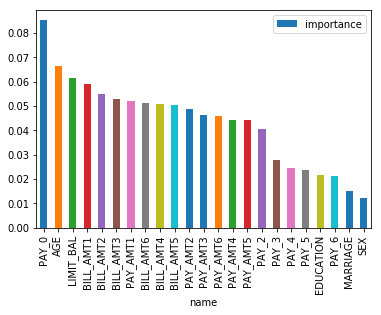

In [34]:
fi = pd.DataFrame({'name': X_tt.columns, 'importance': rf.feature_importances_})
fi.sort_values('importance', ascending=False, inplace=True)
fi.plot.bar(x='name', y='importance')

The top five features of the is model are `PAY_0`, `AGE`, `LIMIT_BAL`, `BILL_AMT1` and `BILL_AMT2`.

`PAY_0` is categorical variable containing information on how they paid their first bill. First bill payments are highly predictive of next week defaults.

It is interesting that only one demographic variable made it into the top 5: age. The other demographic variables: Education, Marriage, and Sex didn't matter very much. It seems like married or not, if you have a high balance and didn't make your first payment then you are likely to default next week.